# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Reading Ratinopathy Data

In [2]:
df=pd.read_excel("cleaned_pronostico_dataset.xlsx")

In [3]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [4]:
df.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [5]:
df.shape

(6000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [7]:
df.age=df.age.astype(int)

In [8]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,retinopathy
1,1,63,99.379736,84.852361,110.382411,retinopathy
2,2,69,111.349455,109.850616,100.828246,retinopathy
3,3,82,95.056128,79.666851,87.066303,retinopathy
4,4,78,109.154591,90.713220,92.511770,retinopathy


# Checking for null Values

In [9]:
df.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

# Checking for duplicate values

In [10]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [11]:
df=df.drop('ID',axis=1)
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77,85.288742,80.021878,79.957109,retinopathy
1,63,99.379736,84.852361,110.382411,retinopathy
2,69,111.349455,109.850616,100.828246,retinopathy
3,82,95.056128,79.666851,87.066303,retinopathy
4,78,109.154591,90.713220,92.511770,retinopathy


In [12]:
df['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

# Checking  Depedent Variable is symmetric or not?

C:\Users\parth\anaconda3\envs\rpycaret\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='prognosis', ylabel='count'>

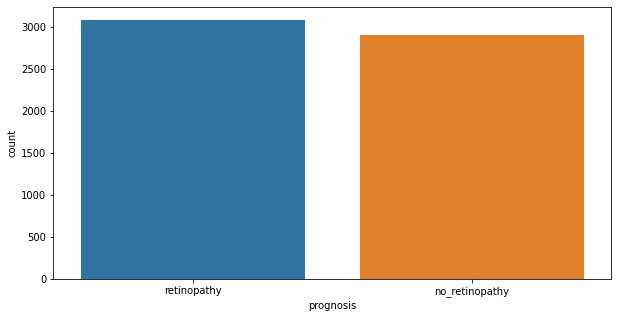

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['prognosis'])

Conclusion: As per the graph no of Zeros(no retinopathy) and no of ones(ratinopathy) value counts are almost equal.so we can
    consider this as symmetrically distributed data for building models.

# Checking How Features are Distributed from its Mean value by Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9e0278208>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9e02786c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9e0278f88>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9e027a4c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9e0279308>],
 'means': []}

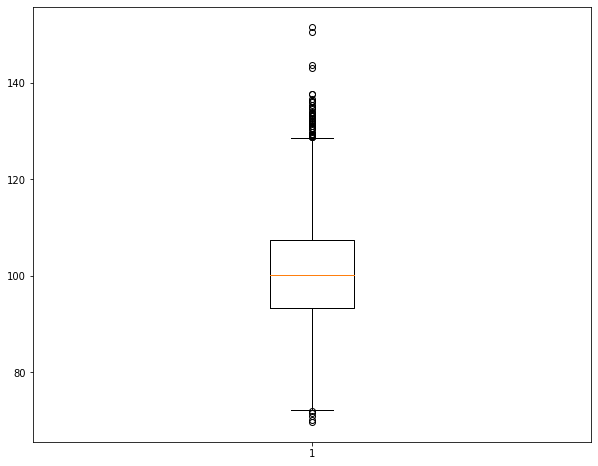

In [14]:
plt.figure(figsize=(10,8))
plt.boxplot(df.systolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9e0032308>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9e0032c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9e0048988>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9e00fe908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9e00fef48>],
 'means': []}

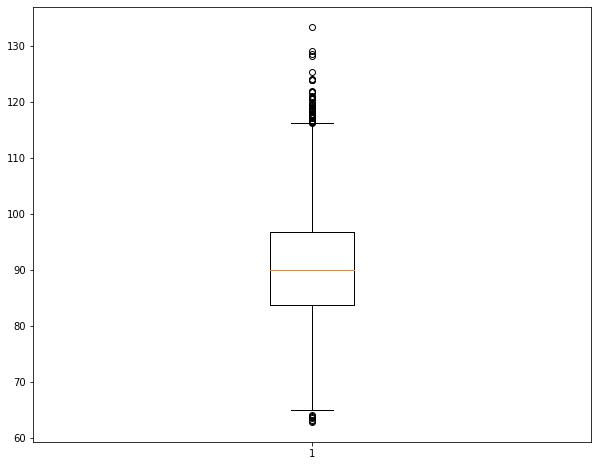

In [15]:
plt.figure(figsize=(10,8))
plt.boxplot(df.diastolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9dff847c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9dff84ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9dff7bcc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9dff9aac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9dff9ad08>],
 'means': []}

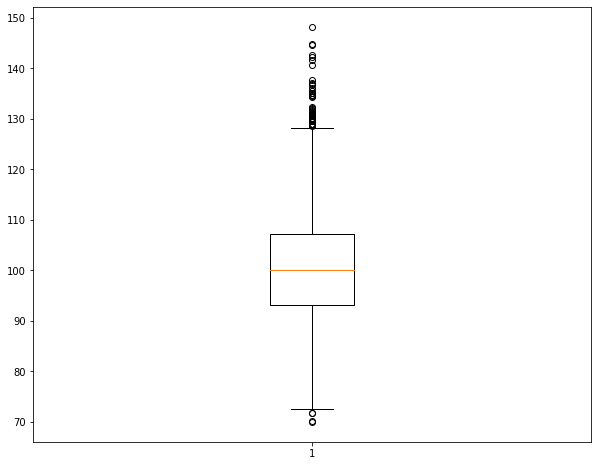

In [16]:
plt.figure(figsize=(10,8))
plt.boxplot(df.cholesterol)

In [17]:
df.skew(axis=0,skipna=True)

C:\Users\parth\anaconda3\envs\rpycaret\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age             0.441397
systolic_bp     0.334655
diastolic_bp    0.336555
cholesterol     0.361514
dtype: float64

# How independent features are related to each other?

In [18]:
df.corr()

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.010493,-0.004957,-0.007063
systolic_bp,0.010493,1.000000,0.405406,0.406029
diastolic_bp,-0.004957,0.405406,1.000000,0.398345
cholesterol,-0.007063,0.406029,0.398345,1.000000


[]

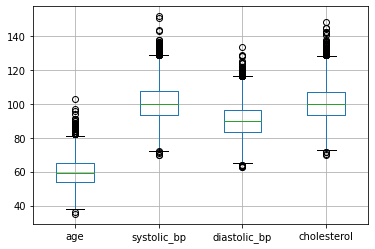

In [19]:
df.boxplot(return_type='dict')
plt.plot()

### From the above plot we can see the outliers in our independent variables, But when deep dived looking at the plot we can clearly see that the systolic_bp level are above 120 which is not normal when considered in an average normal healthy person i.e people having systolic_bp more than 120 are 97% going to have retinopathy according to the dataset, Similarly the normal cholesterol levels are below 130 for an adult above 20 years, above which people will be 99% having illness such as heart conditions/retinopathy, therefore coming to the conclusion when compared with all the variables the data which is being showed as an outlier will not be affecting our model building as they are important values.

##### Ref Link - https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [21]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
sb.set_style('whitegrid')

<AxesSubplot:xlabel='prognosis', ylabel='cholesterol'>

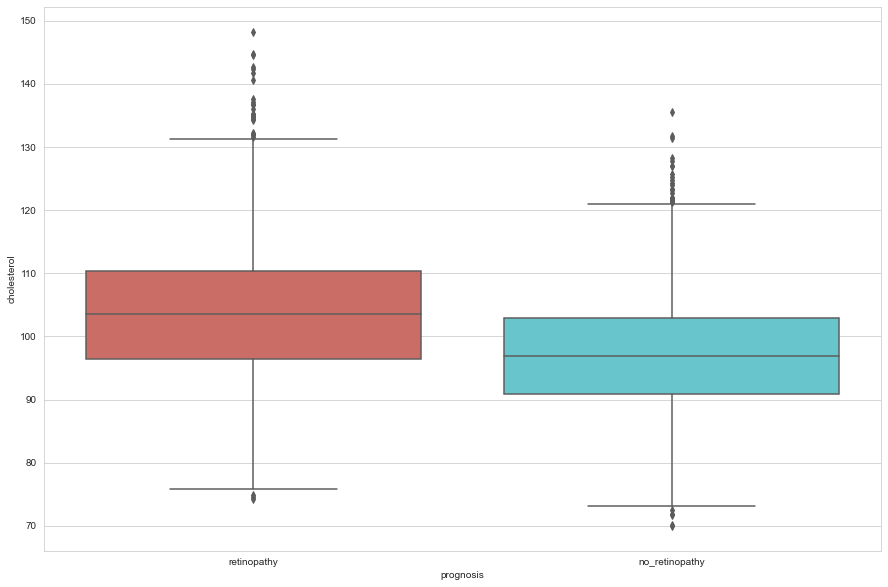

In [22]:
sb.boxplot(x='prognosis', y='cholesterol', data=df, palette='hls')

### As explained previously in the Box-Plot comparison, the people having cholesterol level above 130 are going to have retinopathy such that we can conclude that removing the outliers is not required as it will not create any bias in our analysis/results 

##### Ref Link - https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

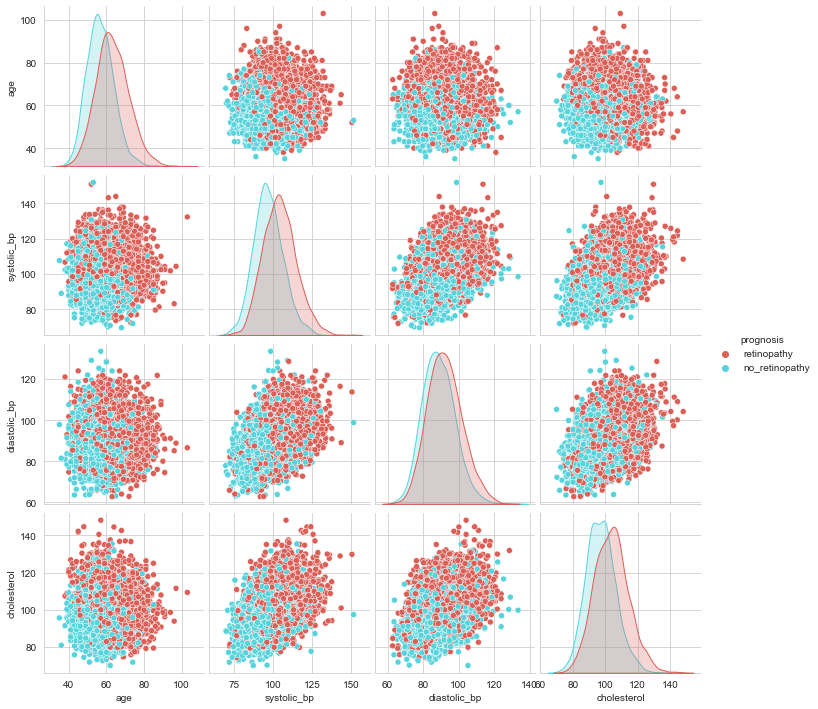

In [23]:
sb.pairplot(df, hue='prognosis', palette='hls')

#### From The above pair-plots we can see that our dataset needs transformation, to normalise the dataset 

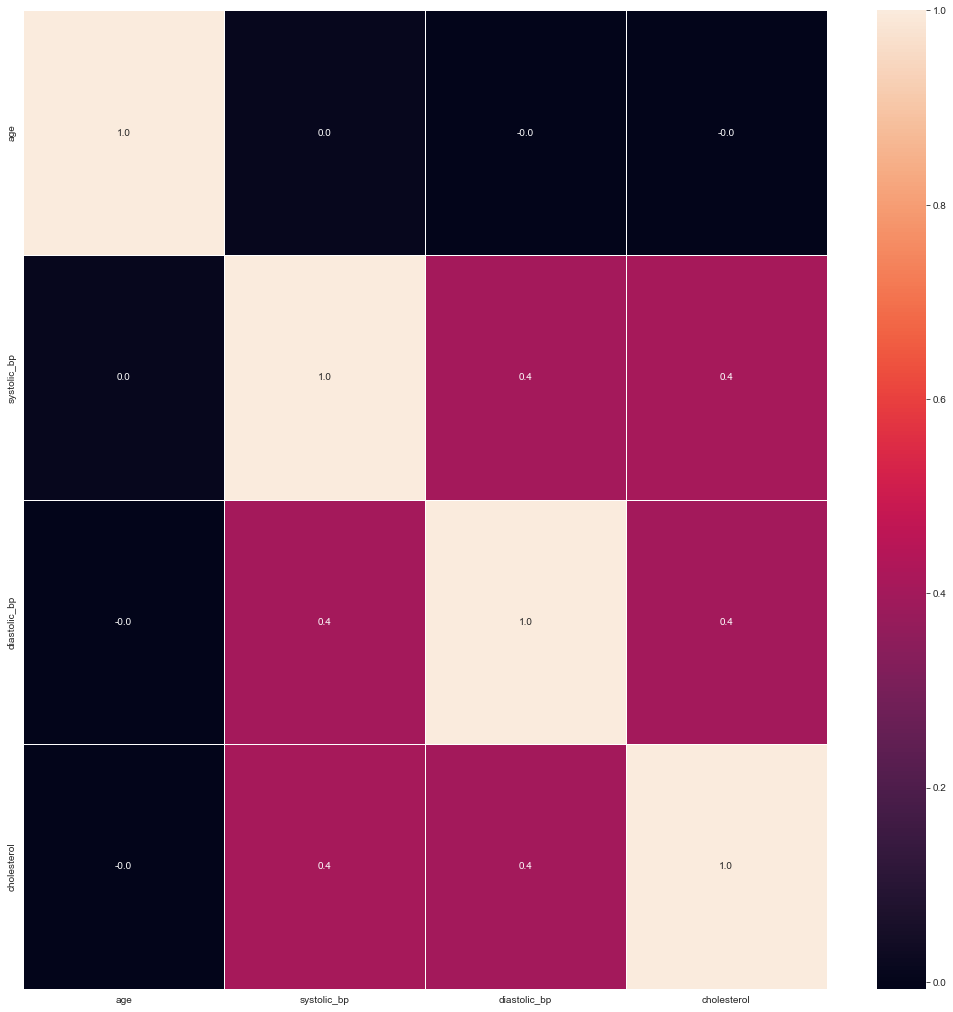

In [24]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

#### This heatmap shows the correlation between the features

Text(0, 0.5, 'diastolic_bp')

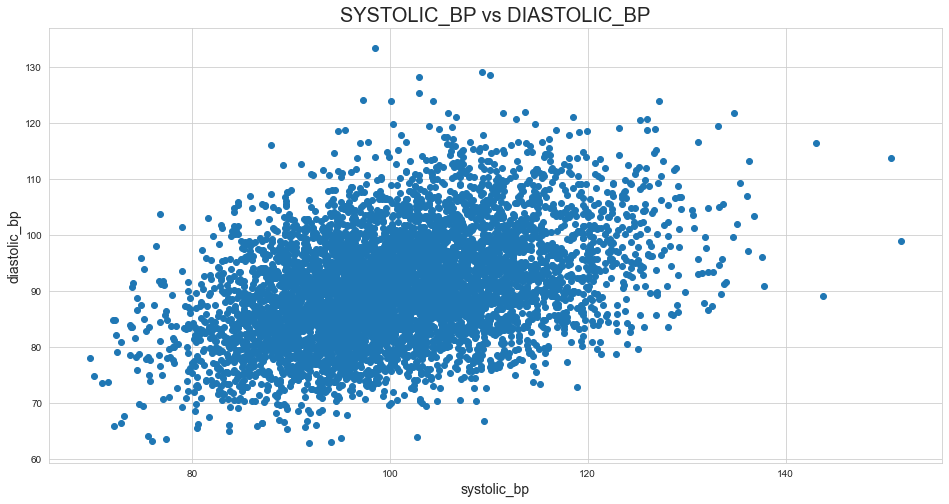

In [25]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['diastolic_bp'])
plt.title("SYSTOLIC_BP vs DIASTOLIC_BP",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('diastolic_bp',fontsize=14)

Text(0, 0.5, 'cholesterol')

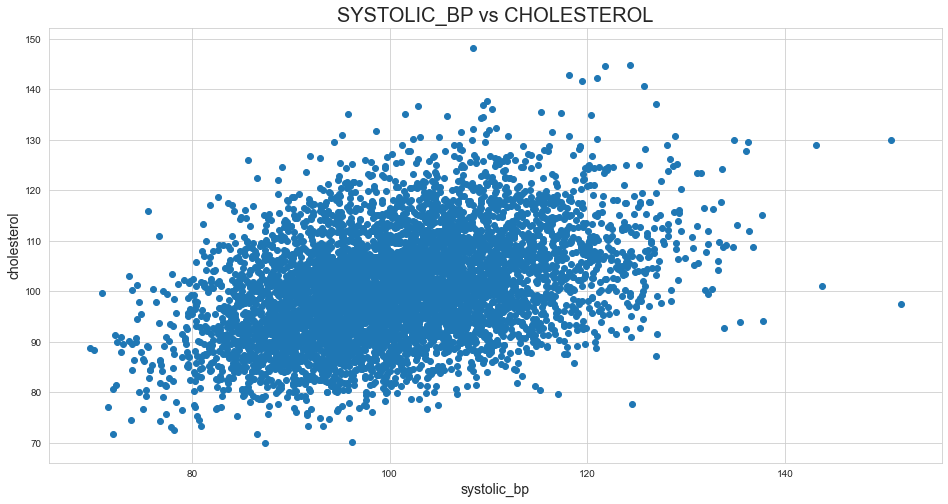

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['cholesterol'])
plt.title("SYSTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Text(0, 0.5, 'cholesterol')

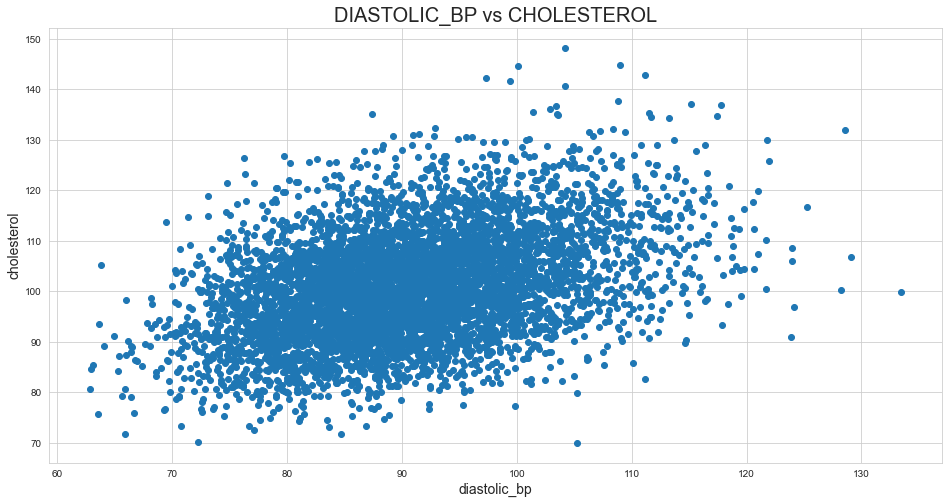

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(df['diastolic_bp'],df['cholesterol'])
plt.title("DIASTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('diastolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Conclusion: From the Calculated value of corelation between these features(i.e 0.4) and from above graph we can say there is no clear correlation between them it is close to Randomness

# Converting Catergorical value to numerical value for dependent feature "prognosis"

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df.prognosis:
    df.prognosis=label_encoder.fit_transform(df.prognosis)
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77,85.288742,80.021878,79.957109,1
1,63,99.379736,84.852361,110.382411,1
2,69,111.349455,109.850616,100.828246,1
3,82,95.056128,79.666851,87.066303,1
4,78,109.154591,90.713220,92.511770,1


In [29]:
import scipy.stats as stat
import pylab 

## After converting the categorical data to numerical data we'll apply Gaussian Transformation

### There are different Feature Engineering methods like, standardization, normalization, transformation, backpropagation to name a few. Out of which we choose to go ahead with the transformation method

### Gaussian Transformation

In [30]:
#### If you want to check whether feature is guassian or normal distributed
#### Normal Q-Q plot on raw data
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

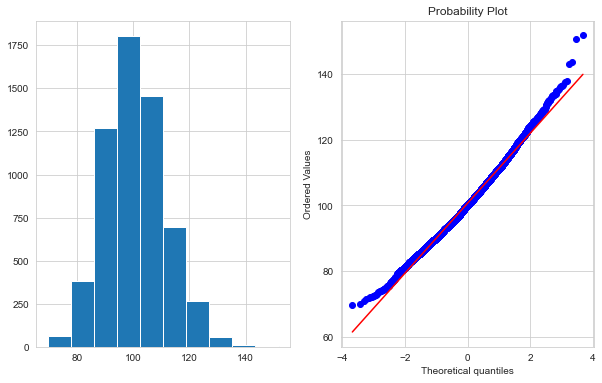

In [31]:
plot_data(df,'systolic_bp')

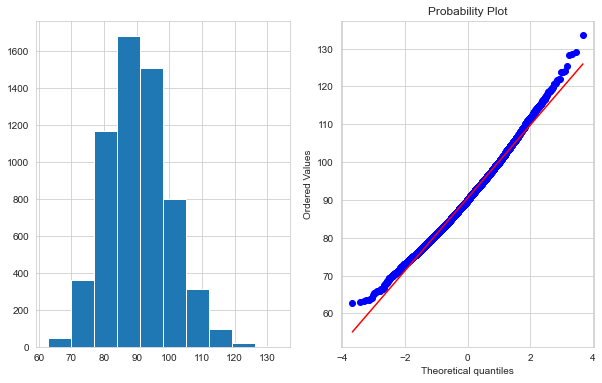

In [32]:
plot_data(df,'diastolic_bp')

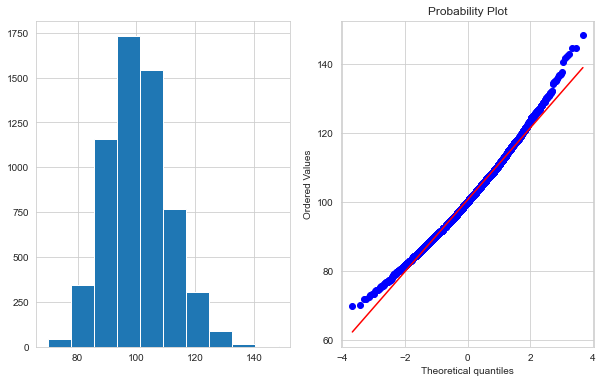

In [33]:
plot_data(df,'cholesterol')

### Logarithmic Transformation

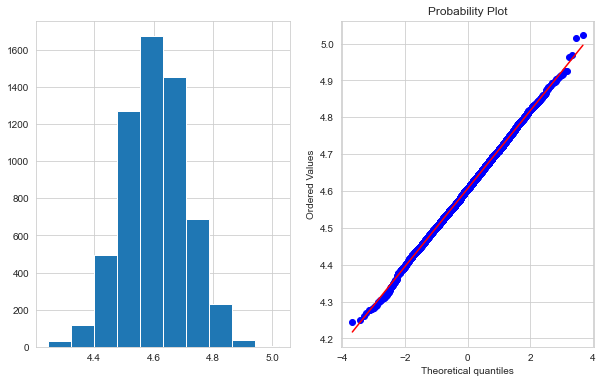

In [34]:
import numpy as np
df['systolic_bp_log']=np.log(df['systolic_bp'])
plot_data(df,'systolic_bp_log')

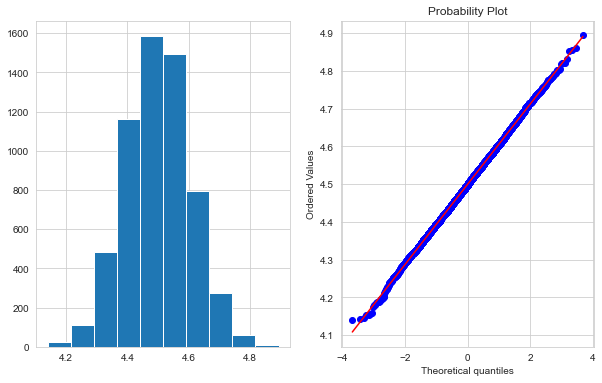

In [35]:
df['diastolic_bp_log']=np.log(df['diastolic_bp'])
plot_data(df,'diastolic_bp_log')

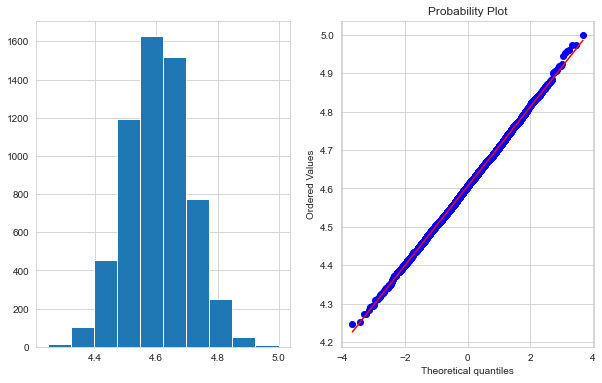

In [36]:
df['cholesterol_log']=np.log(df['cholesterol'])
plot_data(df,'cholesterol_log')

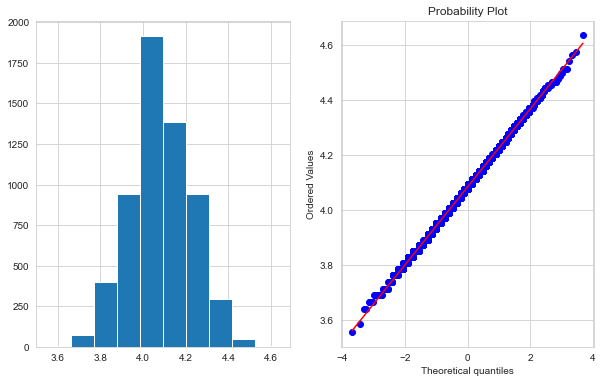

In [37]:
df['age_log']=np.log(df['age'])
plot_data(df,'age_log')

### Reciprocal Transformation

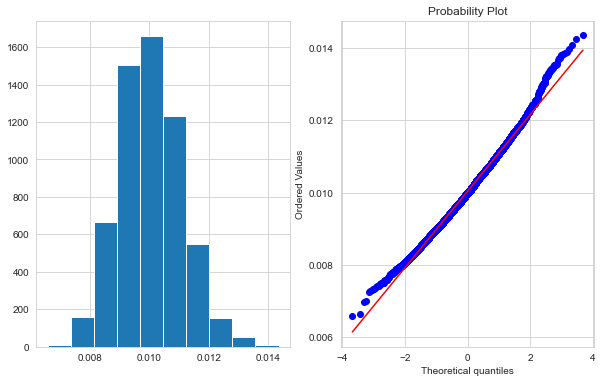

In [38]:
df['systolic_bp_reciprocal']=1/df.systolic_bp
plot_data(df,'systolic_bp_reciprocal')

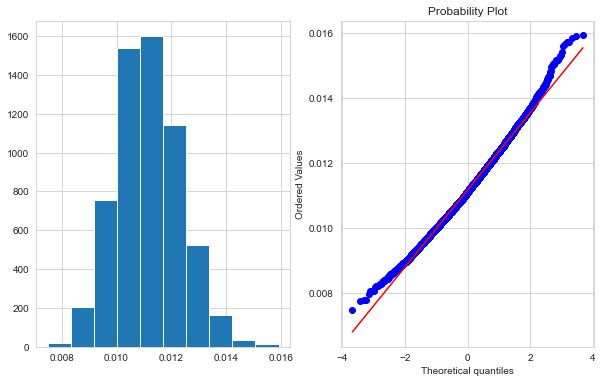

In [39]:
df['diastolic_bp_reciprocal']=1/df.diastolic_bp
plot_data(df,'diastolic_bp_reciprocal')

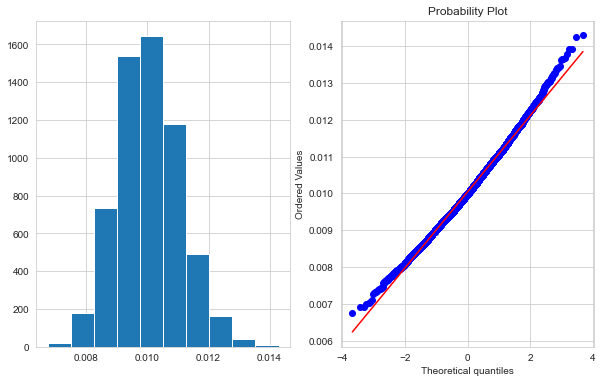

In [40]:
df['cholesterol_reciprocal']=1/df.cholesterol
plot_data(df,'cholesterol_reciprocal')

### SQRT Transformation

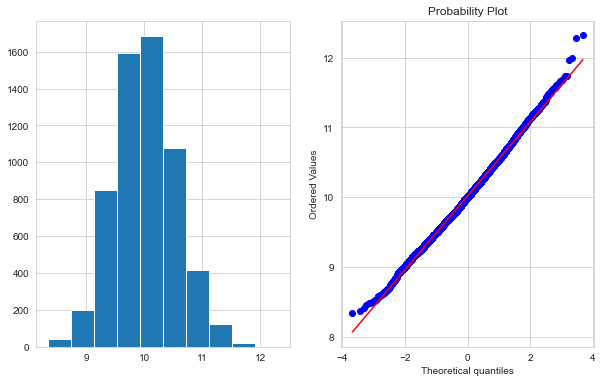

In [41]:
df['systolic_bp_sqaure']=df.systolic_bp**(1/2)
plot_data(df,'systolic_bp_sqaure')

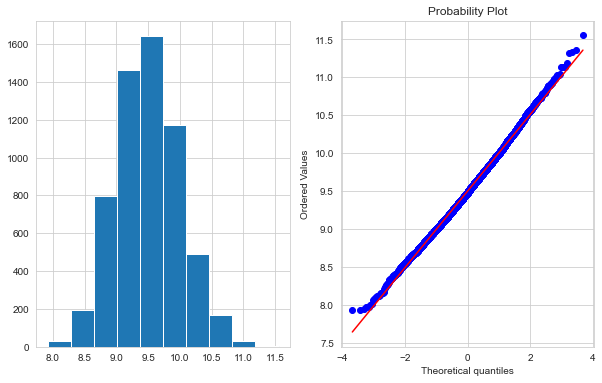

In [42]:
df['diastolic_bp_sqaure']=df.diastolic_bp**(1/2)
plot_data(df,'diastolic_bp_sqaure')

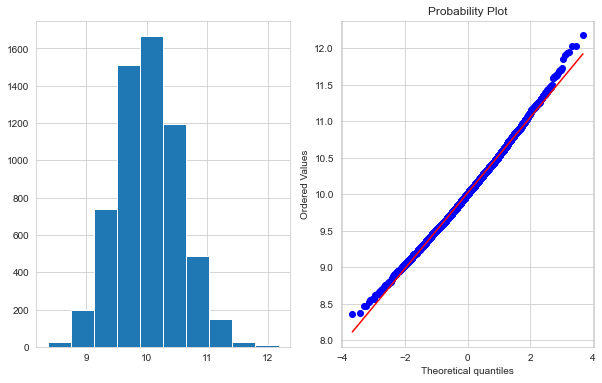

In [43]:
df['cholesterol_sqaure']=df.cholesterol**(1/2)
plot_data(df,'cholesterol_sqaure')

### Exponential Transformation

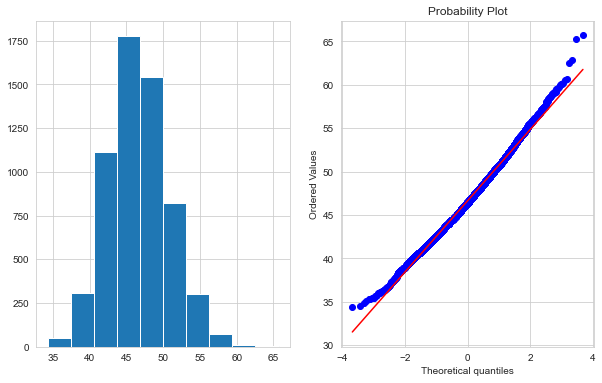

In [44]:
df['systolic_bp_exponential']=df.systolic_bp**(1/1.2)
plot_data(df,'systolic_bp_exponential')

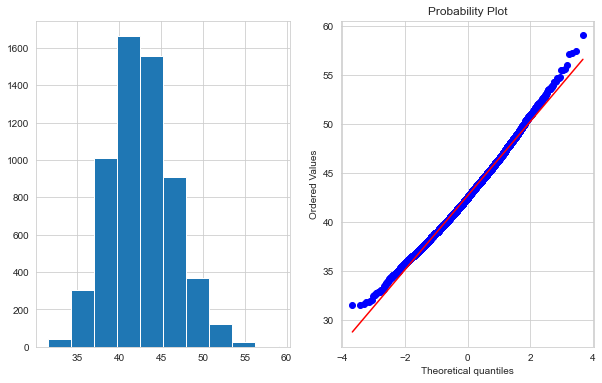

In [45]:
df['diastolic_bp_exponential']=df.diastolic_bp**(1/1.2)
plot_data(df,'diastolic_bp_exponential')

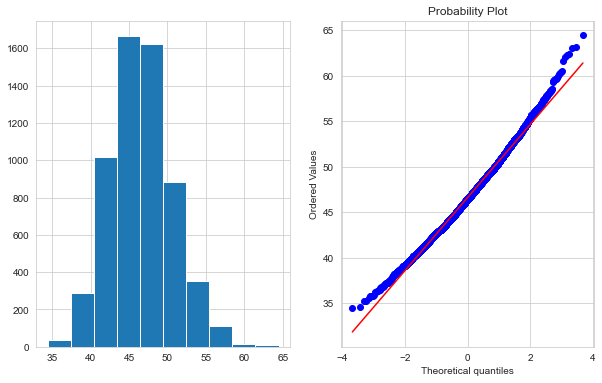

In [46]:
df['cholesterol_exponential']=df.cholesterol**(1/1.2)
plot_data(df,'cholesterol_exponential')

### Box - Cox Transformation

In [47]:
df['systolic_bp_Boxcox'],parameters=stat.boxcox(df['systolic_bp'])
print(parameters)

-0.03799051767399304


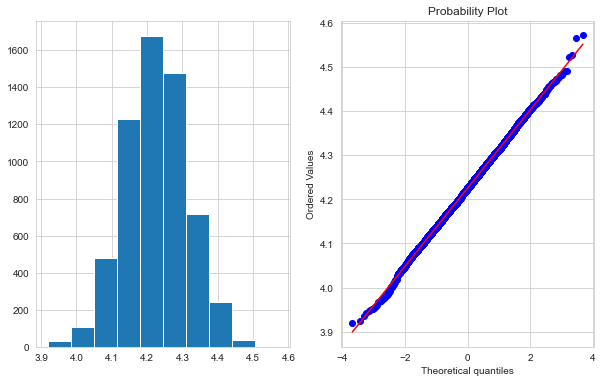

In [48]:
plot_data(df,'systolic_bp_Boxcox')

In [49]:
df['diastolic_bp_Boxcox'],parameters=stat.boxcox(df['diastolic_bp'])
print(parameters)

-0.06091965006551369


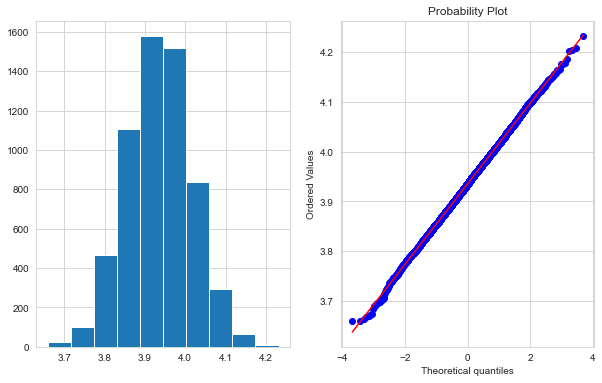

In [50]:
plot_data(df,'diastolic_bp_Boxcox')

In [51]:
df['cholesterol_Boxcox'],parameters=stat.boxcox(df['cholesterol'])
print(parameters)

-0.1476435642180612


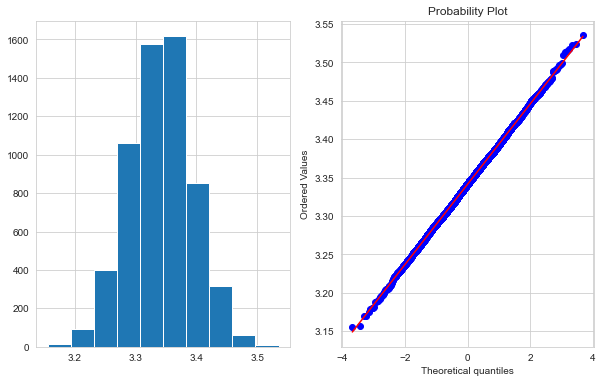

In [52]:
plot_data(df,'cholesterol_Boxcox')

## After analyzing all the transformations applied, like Log-Trans, Exponential-Trans, SQRT-Trans, Box-Cox Trans, the Log-Transformation seems to be the most near to normalization, as the data fits perfectly on the line. So considering the log_transformed data as our final dataset for the model building part we proceed.

### Which Machine Learning Models Are Sensitive To Outliers?

#### Naivye Bayes Classifier--- Not Sensitive To Outliers  
#### SVM-------- Not Sensitive To Outliers
#### Linear Regression---------- Sensitive To Outliers
#### Logistic Regression------- Sensitive To Outliers
#### Decision Tree Regressor or Classifier---- Not Sensitive
#### Ensemble(RF,XGboost,GB)------- Not Sensitive
#### KNN--------------------------- Not Sensitive
#### Kmeans------------------------ Sensitive
#### Hierarichal------------------- Sensitive
#### PCA-------------------------- Sensitive
#### Neural Networks-------------- Sensitive

#### So Based on the above Model data, it concludes that outliers are not going to affect our analysis/results in any way!
#### So Going ahead with all the different model building techniques

In [53]:
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,systolic_bp_log,diastolic_bp_log,cholesterol_log,age_log,systolic_bp_reciprocal,...,cholesterol_reciprocal,systolic_bp_sqaure,diastolic_bp_sqaure,cholesterol_sqaure,systolic_bp_exponential,diastolic_bp_exponential,cholesterol_exponential,systolic_bp_Boxcox,diastolic_bp_Boxcox,cholesterol_Boxcox
0,77,85.288742,80.021878,79.957109,1,4.446042,4.382300,4.381490,4.343805,0.011725,...,0.012507,9.235190,8.945495,8.941874,40.651486,38.548482,38.522480,4.090835,3.846092,3.226235
1,63,99.379736,84.852361,110.382411,1,4.598948,4.440913,4.703951,4.143135,0.010062,...,0.009059,9.968939,9.211534,10.506303,46.175846,40.478083,50.398378,4.219603,3.890891,3.391140
2,69,111.349455,109.850616,100.828246,1,4.712673,4.699121,4.613419,4.234107,0.008981,...,0.009918,10.552225,10.480964,10.041327,50.766055,50.195958,46.736033,4.314891,4.086355,3.345632
3,82,95.056128,79.666851,87.066303,1,4.554468,4.377854,4.466670,4.406719,0.010520,...,0.011485,9.749673,8.925629,9.330933,44.495569,38.405908,41.356307,4.182221,3.842687,3.270561
4,78,109.154591,90.713220,92.511770,1,4.692765,4.507703,4.527336,4.356709,0.009161,...,0.010809,10.447707,9.524349,9.618304,49.930779,42.794913,43.500825,4.298240,3.941747,3.301793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,49,94.857639,86.615671,107.643986,0,4.552377,4.461481,4.678829,3.891820,0.010542,...,0.009290,9.739489,9.306754,10.375162,44.418129,41.177856,49.354279,4.180463,3.906574,3.378573
5996,63,100.039527,93.515186,104.971404,1,4.605565,4.538124,4.653688,4.143135,0.009996,...,0.009526,10.001976,9.670325,10.245555,46.431177,43.893659,48.331006,4.225159,3.964841,3.365949
5997,55,98.421446,102.697875,120.875951,1,4.589259,4.631791,4.794765,4.007333,0.010160,...,0.008273,9.920758,10.133996,10.994360,45.804497,47.457102,54.360476,4.211465,4.035682,3.436182
5998,63,106.809289,88.060631,106.052213,1,4.671045,4.478026,4.663932,4.143135,0.009362,...,0.009429,10.334858,9.384063,10.298166,49.035151,41.749521,48.745341,4.280059,3.919175,3.371098


In [64]:
# Dividing our data into input and output variables 
X = df.drop(['age_log','systolic_bp_log','diastolic_bp_log','cholesterol_log','systolic_bp_reciprocal','diastolic_bp_reciprocal','cholesterol_reciprocal','systolic_bp_sqaure','diastolic_bp_sqaure','cholesterol_sqaure','systolic_bp_exponential','diastolic_bp_exponential','cholesterol_exponential','systolic_bp_Boxcox','diastolic_bp_Boxcox','cholesterol_Boxcox','prognosis'],1)
Y = df['prognosis']

C:\Users\parth\anaconda3\envs\rpycaret\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [65]:
X

,age,systolic_bp,diastolic_bp,cholesterol
0,77,85.288742,80.021878,79.957109
1,63,99.379736,84.852361,110.382411
2,69,111.349455,109.850616,100.828246
3,82,95.056128,79.666851,87.066303
4,78,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49,94.857639,86.615671,107.643986
5996,63,100.039527,93.515186,104.971404
5997,55,98.421446,102.697875,120.875951
5998,63,106.809289,88.060631,106.052213


In [66]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int64

# XG_BOOST_CLASSIFIER

In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [101]:
# lets split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [102]:
# fit the model
model_xg=XGBClassifier(use_label_encoder=False)
evalset=[(X_train,Y_train),(X_test,Y_test)]



In [109]:
model_xg.fit(X_train,Y_train,eval_metric="error",eval_set=evalset)

[0]	validation_0-error:0.23458	validation_1-error:0.26833
[1]	validation_0-error:0.22958	validation_1-error:0.26500
[2]	validation_0-error:0.22354	validation_1-error:0.26583
[3]	validation_0-error:0.21708	validation_1-error:0.26833
[4]	validation_0-error:0.21750	validation_1-error:0.26833
[5]	validation_0-error:0.21438	validation_1-error:0.26250
[6]	validation_0-error:0.21292	validation_1-error:0.26500
[7]	validation_0-error:0.21250	validation_1-error:0.26083
[8]	validation_0-error:0.20833	validation_1-error:0.26000
[9]	validation_0-error:0.20458	validation_1-error:0.26083
[10]	validation_0-error:0.20250	validation_1-error:0.26083
[11]	validation_0-error:0.20021	validation_1-error:0.26250
[12]	validation_0-error:0.19875	validation_1-error:0.26250
[13]	validation_0-error:0.19667	validation_1-error:0.26083
[14]	validation_0-error:0.19687	validation_1-error:0.26000
[15]	validation_0-error:0.19500	validation_1-error:0.26417
[16]	validation_0-error:0.19312	validation_1-error:0.26167
[17]	va

C:\Users\parth\anaconda3\envs\rpycaret\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[27]	validation_0-error:0.16854	validation_1-error:0.25750
[28]	validation_0-error:0.16687	validation_1-error:0.25750
[29]	validation_0-error:0.16604	validation_1-error:0.25750
[30]	validation_0-error:0.16062	validation_1-error:0.25667
[31]	validation_0-error:0.15937	validation_1-error:0.25667
[32]	validation_0-error:0.15625	validation_1-error:0.25500
[33]	validation_0-error:0.15604	validation_1-error:0.25500
[34]	validation_0-error:0.15563	validation_1-error:0.25500
[35]	validation_0-error:0.15604	validation_1-error:0.25500
[36]	validation_0-error:0.15438	validation_1-error:0.25417
[37]	validation_0-error:0.15167	validation_1-error:0.24750
[38]	validation_0-error:0.15104	validation_1-error:0.24833
[39]	validation_0-error:0.14875	validation_1-error:0.24667
[40]	validation_0-error:0.14813	validation_1-error:0.24583
[41]	validation_0-error:0.14438	validation_1-error:0.24583
[42]	validation_0-error:0.14354	validation_1-error:0.24500
[43]	validation_0-error:0.14250	validation_1-error:0.243

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [110]:
y_pred=model_xg.predict(X_test)
score=accuracy_score(Y_test,y_pred)
print("Accuracy: %.3f"% score)      

Accuracy: 0.739


In [111]:
results=model_xg.evals_result()

In [112]:
results

{'validation_0': OrderedDict([('error',
               [0.23458333333333334,
                0.22958333333333333,
                0.22354166666666667,
                0.21708333333333332,
                0.2175,
                0.214375,
                0.21291666666666667,
                0.2125,
                0.20833333333333334,
                0.20458333333333334,
                0.2025,
                0.20020833333333332,
                0.19875,
                0.19666666666666666,
                0.196875,
                0.195,
                0.193125,
                0.19104166666666667,
                0.18979166666666666,
                0.18458333333333332,
                0.185625,
                0.1775,
                0.175625,
                0.174375,
                0.17395833333333333,
                0.17083333333333334,
                0.169375,
                0.16854166666666667,
                0.166875,
                0.16604166666666667,
                